# Cleaning federal election commission candidate data from 2008 to 2022

### Project Name: Clean to Vote
### Members: Ayesha Kesharia (ayeshak2) & Manasi Karale (mkarale2)
### Course: IS 537 Theory and Practice of Data Cleaning
---

### WHAT? 
<div style="text-align: justify">
1. Federal Election Commision (FEC) is a one stop shop for searching all campaign finance data, helping candidates and committees, and researching legal resources. FEC has a lot of datasets like Raining funds, Spending funds, Candidates data, committees data, filings and reports, loans and debts and some other external data soruces. <br>
2. The dataset that we are targeting for this project is the candidate summary data. The candidate summary file includes a financial summary for any candidate for the House, Senate, or President who has registered with the FEC or is listed on an official state ballot. This data is accessible for the current election as well as previous ones dating back to the 2008 election. 
</div>

### WHY?
<div style="text-align: justify">
1. Given the recent election shenanigans we thought, it will be interesting to find out how this data can be used for analysis, and that is where the need to clean this data arose. <br>
2. While analysing this dataset of 50 metadata columns for 4475 candidates in the year 2022 we came across 15 distinct anomalies within the data that needed to be addressed before it could be used for analysis. 
</div>

### HOW?
<div style="text-align: justify">
1. Our comfort with python and excel, the flexibility it provides and the ease of operations is what made us choose these tools to clean the data. <br>
2. Below are some of the items we discovered could be cleaned by using various techniques discussed in the class over the entire semester.
</div>

In [1]:
# importing required cleaning libraries

import pandas as pd
pd.options.display.max_colwidth = 100
import numpy as np
import string

In [2]:
# reading csv into dataframe for further cleaning
candidate_data = pd.read_csv('./raw_data/raw_candidate_summary_2022.csv')

# display loaded csv
candidate_data.head(10)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H2AK01185/?cycle=2022,"GODFREY, MARCUS SCOTT",I2AK01185,H,CA,1.0,LIB,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/12MO00502/?cycle=2022,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,OPEN,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?cycle=2022,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?cycle=2022,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?cycle=2022,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
5,https://www.fec.gov/data/candidate/H0CA33216/?cycle=2022,"LIEW, SARAH SUN DR.",H0CA33216,H,CA,33.0,REP,CHALLENGER,136400.00,135773.40,...,0.00,0.0,0.0,0.00,0.0,5000.00,135773.40,989.69,0.0,1/1/2021
6,https://www.fec.gov/data/candidate/H2CA09121/?cycle=2022,"CHIMA, HARPREET SINGH",H2CA09121,H,CA,9.0,DEM,OPEN,80930.61,80940.93,...,12199.66,0.0,0.0,12199.66,1873.7,68730.95,66867.57,0.00,0.0,5/15/2021
7,https://www.fec.gov/data/candidate/H2GA10281/?cycle=2022,"JONES, VERNON",H2GA10281,H,GA,10.0,REP,OPEN,532520.99,532489.09,...,0.00,0.0,0.0,0.00,0.0,532307.39,532275.49,0.00,0.0,1/1/2022
8,https://www.fec.gov/data/candidate/H2GA14028/?cycle=2022,"TRAMBAUER-SMITH, BRITTANY",H2GA14028,H,ST,14.0,DEM,CHALLENGER,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN
9,https://www.fec.gov/data/candidate/H2PA18226/?cycle=2022,"FOX, STEPHANIE",H2PA18226,H,PA,18.0,DEM,OPEN,0.00,0.00,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN


## Analysis example: 
1. To find out which party has the least amount of candidates participating from in year 2022.

<AxesSubplot:title={'center':'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

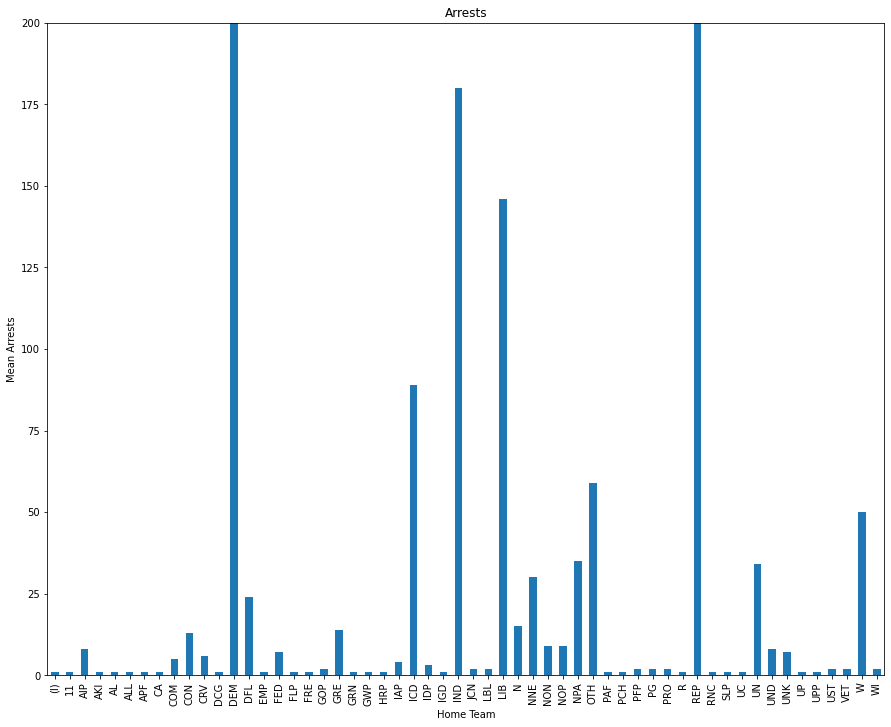

In [3]:
candidate_data_analysis = candidate_data.groupby(['Cand_Party_Affiliation'])['Cand_Id'].count()

candidate_data_analysis.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(15, 12), ylim=(0,200))

## 1. Cleaning 'Link_Image' column:
* Make sure the link has correct Cand_Id value in it
* Make sure the link has correct prefix - 'https://www.fec.gov/data/candidate/' and suffix - '[/?cycle=2022](https://www.fec.gov/data/candidate/)'

In [4]:
# Check which candidates have inaccurate 'Link_Image' values

candidate_data['Inaccurate_Link'] = candidate_data.apply(lambda x: x['Link_Image'] 
                                if x['Link_Image'] == 'https://www.fec.gov/data/candidate/'+x['Cand_Id']+'/?cycle=2022' 
                                else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Link']=='Inaccurate'][['Link_Image','Cand_Name','Cand_Id','Inaccurate_Link']]

,Link_Image,Cand_Name,Cand_Id,Inaccurate_Link
0,https://www.fec.gov/data/candidate/H2AK01185/?cycle=2022,"GODFREY, MARCUS SCOTT",I2AK01185,Inaccurate
1,https://www.fec.gov/data/candidate/12MO00502/?cycle=2022,"NICHOLAS CRANE, STRAUSS",S2MO00502,Inaccurate
12,https://www.fec.gov/data/candidate/H2TN05370/?cycle=2022,"WINSTEAD, KURT",Y2UG05370,Inaccurate
46,https://www.fec.gov/data/candidate/S2OK00111/?cycle=2022,"LAHMEYER, JACKSON RHODES",V2KA00111,Inaccurate
66,https://www.fec.gov/data/candidate/H2CA02241/?cycle=2022,"COULOMBE, CHRIS MR",H2MH02241,Inaccurate
236,https://www.fec.gov/data/candidate/H8VT01065/?cycle=2022,"TYNIO, NATASHA",H8AK01065,Inaccurate
293,https://www.fec.gov/data/candidate/S2SC00103/?cycle=2022,"MATTHEWS, KRYSTLE",S2MK00103,Inaccurate
1757,https://www.fec.gov/data/candidate/P20005989/?cycle=2022,"HOLLOWAY, AMBASSADOR KINGISAAC MONTRAI",P21005989,Inaccurate
2576,https://www.fec.gov/data/candidate/P20005971/?cycle=2022,"PACHECO, RICHARD J",P23405971,Inaccurate
2940,https://www.fec.gov/data/candidate/P20005997/?cycle=2022,"SELLERS, ANTOINETTE",P2FG05997,Inaccurate


In [5]:
# Replace incaccurate values in 'Link_Image' with the correct or expected values

candidate_data['Link_Image'] = candidate_data.apply(lambda x: x['Link_Image'] 
                                if x['Link_Image'] == 'https://www.fec.gov/data/candidate/'+x['Cand_Id']+'/?cycle=2022' 
                                else 'https://www.fec.gov/data/candidate/'+x['Cand_Id']+'/?cycle=2022', axis=1)
candidate_data[candidate_data['Inaccurate_Link']=='Inaccurate'][['Link_Image','Cand_Name','Cand_Id','Inaccurate_Link']]

,Link_Image,Cand_Name,Cand_Id,Inaccurate_Link
0,https://www.fec.gov/data/candidate/I2AK01185/?cycle=2022,"GODFREY, MARCUS SCOTT",I2AK01185,Inaccurate
1,https://www.fec.gov/data/candidate/S2MO00502/?cycle=2022,"NICHOLAS CRANE, STRAUSS",S2MO00502,Inaccurate
12,https://www.fec.gov/data/candidate/Y2UG05370/?cycle=2022,"WINSTEAD, KURT",Y2UG05370,Inaccurate
46,https://www.fec.gov/data/candidate/V2KA00111/?cycle=2022,"LAHMEYER, JACKSON RHODES",V2KA00111,Inaccurate
66,https://www.fec.gov/data/candidate/H2MH02241/?cycle=2022,"COULOMBE, CHRIS MR",H2MH02241,Inaccurate
236,https://www.fec.gov/data/candidate/H8AK01065/?cycle=2022,"TYNIO, NATASHA",H8AK01065,Inaccurate
293,https://www.fec.gov/data/candidate/S2MK00103/?cycle=2022,"MATTHEWS, KRYSTLE",S2MK00103,Inaccurate
1757,https://www.fec.gov/data/candidate/P21005989/?cycle=2022,"HOLLOWAY, AMBASSADOR KINGISAAC MONTRAI",P21005989,Inaccurate
2576,https://www.fec.gov/data/candidate/P23405971/?cycle=2022,"PACHECO, RICHARD J",P23405971,Inaccurate
2940,https://www.fec.gov/data/candidate/P2FG05997/?cycle=2022,"SELLERS, ANTOINETTE",P2FG05997,Inaccurate


In [6]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Link', axis=1)

## 2. Cleaning 'Cand_Name':
* Make every column hold only one unit value
* Make sure the column is split into two as 'Cand_First_Name' - after the comma and 'Cand_Last_Name' - before the comma

In [7]:
# check how multiple variables are stored in one column 

candidate_data.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/I2AK01185/?cycle=2022,"GODFREY, MARCUS SCOTT",I2AK01185,H,CA,1.0,LIB,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/S2MO00502/?cycle=2022,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,OPEN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?cycle=2022,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?cycle=2022,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?cycle=2022,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
# splitting the full name into two values into first name and last name

candidate_data[['Cand_Last_Name','Cand_First_Name']] = candidate_data.Cand_Name.str.split(",", n=1,expand=True)

# drop the column no longer required and rearrange the columns into correct order

candidate_data=candidate_data.drop(columns=['Cand_Name'],axis=1)
candidate_data = candidate_data.iloc[:,[0,49,50,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,
                                        29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]]

# check how multiple values are now split into different columns

candidate_data

,Link_Image,Cand_Last_Name,Cand_First_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/I2AK01185/?cycle=2022,GODFREY,MARCUS SCOTT,I2AK01185,H,CA,1.0,LIB,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/S2MO00502/?cycle=2022,NICHOLAS CRANE,STRAUSS,S2MO00502,S,MO,0.0,NaN,OPEN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?cycle=2022,PINNEY,DWAYNE,S2FL00532,S,FL,0.0,REP,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?cycle=2022,DEHART,VAUGHAN BRANDON BRENDAN,H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?cycle=2022,NEUBERT,KEITH,S2WI00367,S,WI,0.0,REP,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,https://www.fec.gov/data/candidate/H2IL13187/?cycle=2022,TAYLOR,ELLIS EVERETT,H2IL13187,H,IL,13.0,DEM,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4471,https://www.fec.gov/data/candidate/H2PA05116/?cycle=2022,DEVAUGHN-GOODWIN,ALFEIA DEVAUGHN-GOOD,H2PA05116,H,PA,5.0,REP,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4472,https://www.fec.gov/data/candidate/H2CA28170/?cycle=2022,RODRIGUEZ,TONY,H2CA28170,H,CA,30.0,IND,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4473,https://www.fec.gov/data/candidate/H2IA04133/?cycle=2022,GROSSMAN,KYLE WILLIAM,H2IA04133,H,IA,4.0,LIB,CHALLENGER,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## 3. Performing quality check on 'Cand_Id':
* Sort according to the 'Cand_Id' column
* Make sure the column 'Cand_Id' is derived from other columns according to the FEC standards: 
    1. **1st character** - H,S
        ; **3rd and 4th characters** - Candidate Office State Abbreviation
    2. **1st character** - P
        ; **3rd and 4th characters** - 00
* Correct any miscalculated values

In [9]:
# sort according to candidate id 
candidate_data = candidate_data.sort_values(by=['Cand_Id'])
candidate_data

,Link_Image,Cand_Last_Name,Cand_First_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
4314,https://www.fec.gov/data/candidate/H0AL01055/?cycle=2022,CARL,"JERRY LEE, JR",H0AL01055,H,AL,1.0,REP,INCUMBENT,1100196.76,...,21700.0,0.0,0.0,21700.0,131127.85,796666.88,442650.68,111972.59,0.0,1/1/2021
1993,https://www.fec.gov/data/candidate/H0AL02202/?cycle=2022,HARVEY-HALL,PHYLLIS,H0AL02202,H,AL,2.0,DEM,CHALLENGER,54403.32,...,0.0,0.0,0.0,0.0,588.12,47580.32,53853.48,0.00,0.0,1/1/2021
4315,https://www.fec.gov/data/candidate/H0AL07086/?cycle=2022,SEWELL,TERRI A.,H0AL07086,H,AL,7.0,DEM,INCUMBENT,2162002.83,...,7342.0,0.0,1500.0,8842.0,179307.30,2139974.90,1143527.36,2243480.25,0.0,1/1/2021
4316,https://www.fec.gov/data/candidate/H0AR01083/?cycle=2022,CRAWFORD,ERIC ALAN RICK,H0AR01083,H,AR,1.0,REP,INCUMBENT,1007070.34,...,0.0,0.0,0.0,0.0,4500.00,1007045.34,566944.13,182708.24,0.0,1/1/2021
1994,https://www.fec.gov/data/candidate/H0AR03055/?cycle=2022,WOMACK,STEVE,H0AR03055,H,AR,3.0,REP,INCUMBENT,1482751.41,...,1550.0,0.0,0.0,1550.0,4000.00,1449024.29,906722.43,1363256.70,0.0,1/1/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,https://www.fec.gov/data/candidate/S8WA00137/?cycle=2022,AMUNDSON,THOR,S8WA00137,S,WA,0.0,IND,CHALLENGER,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3455,https://www.fec.gov/data/candidate/S8WA00376/?cycle=2022,BUTLER,JON,S8WA00376,S,WA,NaN,IND,CHALLENGER,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
46,https://www.fec.gov/data/candidate/V2KA00111/?cycle=2022,LAHMEYER,JACKSON RHODES,V2KA00111,S,OK,0.0,REP,CHALLENGER,987013.48,...,2900.0,0.0,0.0,2900.0,8900.00,950962.77,903891.51,0.00,0.0,1/1/2021
4468,https://www.fec.gov/data/candidate/W2HI00163/?cycle=2022,LAVONNE,ASIA,W2HI00163,S,HI,0.0,REP,CHALLENGER,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN


In [10]:
# Check which candidates have inaccurate 'Cand_Id' values

candidate_data['Inaccurate_Id'] = candidate_data.apply(lambda x: x['Cand_Id'] 
                                if x['Cand_Id'][0] == x['Cand_Office'] 
                                                       and (x['Cand_Id'][2:4] == x['Cand_Office_St'] 
                                                            or x['Cand_Id'][2:4] == '00') 
                                else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Id']=='Inaccurate'][['Cand_Id','Cand_Office','Cand_Office_St','Inaccurate_Id']]

,Cand_Id,Cand_Office,Cand_Office_St,Inaccurate_Id
641,H0TX11230,H,GF,Inaccurate
1300,H0TX12246,H,DF,Inaccurate
1043,H2CA21241,H,IK,Inaccurate
8,H2GA14028,H,ST,Inaccurate
1688,H2MA02093,H,NB,Inaccurate
66,H2MH02241,H,CA,Inaccurate
195,H2MN01355,H,JK,Inaccurate
1479,H2OH11300,H,SW,Inaccurate
236,H8AK01065,H,VT,Inaccurate
0,I2AK01185,H,CA,Inaccurate


In [11]:
# Check which candidates have inaccurate 'Cand_Id' values

candidate_data['Cand_Id'] = candidate_data.apply(lambda x: x['Cand_Id'] 
                                if x['Cand_Id'][0] == x['Cand_Office'] 
                                                       and (x['Cand_Id'][2:4] == x['Cand_Office_St'] 
                                                            or x['Cand_Id'][2:4] == '00') 
                                else (x['Cand_Office'] + x['Cand_Id'][1] + '00' + x['Cand_Id'][-5:] 
                                      if x['Cand_Id'][0] == 'P'
                                      else x['Cand_Office'] + x['Cand_Id'][1] + x['Cand_Office_St'] + x['Cand_Id'][-5:])
                                                 , axis=1)
candidate_data[candidate_data['Inaccurate_Id']=='Inaccurate'][['Cand_Id','Cand_Office','Cand_Office_St','Inaccurate_Id']]

,Cand_Id,Cand_Office,Cand_Office_St,Inaccurate_Id
641,H0GF11230,H,GF,Inaccurate
1300,H0DF12246,H,DF,Inaccurate
1043,H2IK21241,H,IK,Inaccurate
8,H2ST14028,H,ST,Inaccurate
1688,H2NB02093,H,NB,Inaccurate
66,H2CA02241,H,CA,Inaccurate
195,H2JK01355,H,JK,Inaccurate
1479,H2SW11300,H,SW,Inaccurate
236,H8VT01065,H,VT,Inaccurate
0,H2CA01185,H,CA,Inaccurate


In [12]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Id', axis=1)

## 4. Increase the readability of 'Cand_Office':
* Improve the readability of 'Cand_Office' column by replacing uncommon abbrevations with actual fullforms.

In [13]:
candidate_data.head()

,Link_Image,Cand_Last_Name,Cand_First_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
4314,https://www.fec.gov/data/candidate/H0AL01055/?cycle=2022,CARL,"JERRY LEE, JR",H0AL01055,H,AL,1.0,REP,INCUMBENT,1100196.76,...,21700.0,0.0,0.0,21700.0,131127.85,796666.88,442650.68,111972.59,0.0,1/1/2021
1993,https://www.fec.gov/data/candidate/H0AL02202/?cycle=2022,HARVEY-HALL,PHYLLIS,H0AL02202,H,AL,2.0,DEM,CHALLENGER,54403.32,...,0.0,0.0,0.0,0.0,588.12,47580.32,53853.48,0.00,0.0,1/1/2021
4315,https://www.fec.gov/data/candidate/H0AL07086/?cycle=2022,SEWELL,TERRI A.,H0AL07086,H,AL,7.0,DEM,INCUMBENT,2162002.83,...,7342.0,0.0,1500.0,8842.0,179307.30,2139974.90,1143527.36,2243480.25,0.0,1/1/2021
4316,https://www.fec.gov/data/candidate/H0AR01083/?cycle=2022,CRAWFORD,ERIC ALAN RICK,H0AR01083,H,AR,1.0,REP,INCUMBENT,1007070.34,...,0.0,0.0,0.0,0.0,4500.00,1007045.34,566944.13,182708.24,0.0,1/1/2021
1994,https://www.fec.gov/data/candidate/H0AR03055/?cycle=2022,WOMACK,STEVE,H0AR03055,H,AR,3.0,REP,INCUMBENT,1482751.41,...,1550.0,0.0,0.0,1550.0,4000.00,1449024.29,906722.43,1363256.70,0.0,1/1/2021


In [14]:
#replace H to House, P to president, S to Senate

candidate_data['Cand_Office']=candidate_data['Cand_Office'].replace('P','President')
candidate_data['Cand_Office']=candidate_data['Cand_Office'].replace('H','House')
candidate_data['Cand_Office']=candidate_data['Cand_Office'].replace('S','Senate')
candidate_data.head()

,Link_Image,Cand_Last_Name,Cand_First_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
4314,https://www.fec.gov/data/candidate/H0AL01055/?cycle=2022,CARL,"JERRY LEE, JR",H0AL01055,House,AL,1.0,REP,INCUMBENT,1100196.76,...,21700.0,0.0,0.0,21700.0,131127.85,796666.88,442650.68,111972.59,0.0,1/1/2021
1993,https://www.fec.gov/data/candidate/H0AL02202/?cycle=2022,HARVEY-HALL,PHYLLIS,H0AL02202,House,AL,2.0,DEM,CHALLENGER,54403.32,...,0.0,0.0,0.0,0.0,588.12,47580.32,53853.48,0.00,0.0,1/1/2021
4315,https://www.fec.gov/data/candidate/H0AL07086/?cycle=2022,SEWELL,TERRI A.,H0AL07086,House,AL,7.0,DEM,INCUMBENT,2162002.83,...,7342.0,0.0,1500.0,8842.0,179307.30,2139974.90,1143527.36,2243480.25,0.0,1/1/2021
4316,https://www.fec.gov/data/candidate/H0AR01083/?cycle=2022,CRAWFORD,ERIC ALAN RICK,H0AR01083,House,AR,1.0,REP,INCUMBENT,1007070.34,...,0.0,0.0,0.0,0.0,4500.00,1007045.34,566944.13,182708.24,0.0,1/1/2021
1994,https://www.fec.gov/data/candidate/H0AR03055/?cycle=2022,WOMACK,STEVE,H0AR03055,House,AR,3.0,REP,INCUMBENT,1482751.41,...,1550.0,0.0,0.0,1550.0,4000.00,1449024.29,906722.43,1363256.70,0.0,1/1/2021


## 5. Whitelisting 'Cand_Office_St' and 'Cand_State':
* Create a whitelist that includes all standard postal code abbrevations of the states
* Ensure the values are included from this whitelist only
* If different values are encountered, then replace them with 'Unknown'

In [15]:
# create whitelist of candidate office state and identify wrong values

whitelist_candidate_office_st = ['AL','NE','AK','AS','NV','AZ','NH','AR','NJ','CA','NM','CO','NY','CT','NC','DE','ND',
                                 'DC','OH','FL','OK','GA','GU','OR','HI','PA','ID','PR','IL','RI','IN','SC','IA','SD',
                                 'KS','TN','KY','TX','LA','UT','ME','VT','MD','VA','MA','VI','MI','WA','MN','WV','MP',
                                 'MS','WI','MO','WY','MT','US']

candidate_data['Inaccurate_Office_State'] = candidate_data.apply(lambda x: x['Cand_Office_St'] 
                                           if x['Cand_Office_St'] in whitelist_candidate_office_st
                                           else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Office_State'] == 'Inaccurate'][['Cand_Id',
                                                                           'Cand_Office_St', 
                                                                           'Inaccurate_Office_State']]

,Cand_Id,Cand_Office_St,Inaccurate_Office_State
641,H0GF11230,GF,Inaccurate
1300,H0DF12246,DF,Inaccurate
1043,H2IK21241,IK,Inaccurate
8,H2ST14028,ST,Inaccurate
1688,H2NB02093,NB,Inaccurate
195,H2JK01355,JK,Inaccurate
1479,H2SW11300,SW,Inaccurate
735,S2BV00906,BV,Inaccurate
418,S4DF11285,DF,Inaccurate


In [16]:
# replace wrong values with - 'Unknown' to increase accuracy of the data

candidate_data['Cand_Office_St'] = candidate_data.apply(lambda x: x['Cand_Office_St'] 
                                           if x['Cand_Office_St'] in whitelist_candidate_office_st
                                           else 'Unknown', axis=1)
candidate_data[candidate_data['Cand_Office_St']=='Unknown'][['Cand_Id',
                                                             'Cand_Office_St', 
                                                             'Inaccurate_Office_State']]

,Cand_Id,Cand_Office_St,Inaccurate_Office_State
641,H0GF11230,Unknown,Inaccurate
1300,H0DF12246,Unknown,Inaccurate
1043,H2IK21241,Unknown,Inaccurate
8,H2ST14028,Unknown,Inaccurate
1688,H2NB02093,Unknown,Inaccurate
195,H2JK01355,Unknown,Inaccurate
1479,H2SW11300,Unknown,Inaccurate
735,S2BV00906,Unknown,Inaccurate
418,S4DF11285,Unknown,Inaccurate


In [17]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Office_State', axis=1)

In [18]:
# create whitelist of candidate home state and identify wrong values

whitelist_candidate_home_st = ['AL','NE','AK','AS','NV','AZ','NH','AR','NJ','CA','NM','CO','NY','CT','NC','DE','ND','DC',
                               'OH','FL','OK','GA','GU','OR','HI','PA','ID','PR','IL','RI','IN','SC','IA','SD','KS','TN',
                               'KY','TX','LA','UT','ME','VT','MD','VA','MA','VI','MI','WA','MN','WV','MP','MS','WI','MO',
                               'WY','MT','US']
candidate_data['Inaccurate_Home_State'] = candidate_data.apply(lambda x: x['Cand_State'] 
                                           if x['Cand_State'] in whitelist_candidate_home_st
                                           else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Home_State'] == 'Inaccurate'][['Cand_Id',
                                                                           'Cand_State', 
                                                                           'Inaccurate_Home_State']]

,Cand_Id,Cand_State,Inaccurate_Home_State
3691,H2FL13139,NaN,Inaccurate


In [19]:
# replace wrong values with - 'Unknown' to increase accuracy of the data

candidate_data['Cand_State'] = candidate_data.apply(lambda x: x['Cand_State'] 
                                           if x['Cand_State'] in whitelist_candidate_office_st
                                           else 'Unknown', axis=1)
candidate_data[candidate_data['Cand_State']=='Unknown'][['Cand_Id', 'Cand_State', 'Inaccurate_Home_State']]

,Cand_Id,Cand_State,Inaccurate_Home_State
3691,H2FL13139,Unknown,Inaccurate


In [20]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Home_State', axis=1)

## 6. Whitelisting 'Cand_Part_Affiliation':
* Create a whitelist that includes all standard 3 character abbrevations of all party participants
* Ensure the values are included from this whitelist only
* If different values are encountered, then replace them with 'UNK' - UNK is a standard abbrevation for parties not known to the FEC.

In [21]:
# checks white list candidate party affiliation
# this whitelist is imported from the official FEC website - https://www.fec.gov/campaign-finance-data/party-code-descriptions/

whitelist_candidate_party_affiliation = ['ACE','AKI','AIC','AIP','AMP','APF','AE','CIT','CMD','CMP','COM','CNC','CRV','CON',
                                         'CST','COU','DCG','DNL','DEM','D/C','DFL','DGR','FED','FLP','FRE','GWP','GRT','GRE',
                                         'GR','HRP','IDP','IND','IAP','ICD','IGR','IP','IDE','IGD','JCN','JUS','LRU','LBR',
                                         'LFT','LBL','LIB','LBU','MTP','NDP','NLP','NA','NJC','NPP','NPA','NOP','NNE','N',
                                         'NON','OE','OTH','PG','PSL','PAF','PFP','PFD','POP','PPY','PCH','PPD','PRO','NAP',
                                         'PRI','RUP','REF','REP','RES','RTL','SEP','SLP','SUS','SOC','SWP','TX','TWR','TEA',
                                         'THD','LAB','USP','UST','UN','UC','UNI','UNK','VET','WTP','W']
candidate_data['Inaccurate_Party'] = candidate_data.apply(lambda x: x['Cand_Party_Affiliation'] 
                                           if x['Cand_Party_Affiliation'] in whitelist_candidate_party_affiliation
                                           else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Party'] == 'Inaccurate'][['Cand_Id', 'Cand_Party_Affiliation', 'Inaccurate_Party']]

,Cand_Id,Cand_Party_Affiliation,Inaccurate_Party
2096,H2AK00440,UND,Inaccurate
2097,H2AK00457,UND,Inaccurate
2161,H2AK00465,UND,Inaccurate
2162,H2AK00473,UND,Inaccurate
2164,H2AK00481,UND,Inaccurate
2166,H2AK00499,UND,Inaccurate
3478,H2AK00523,UND,Inaccurate
4266,H2AL05144,AL,Inaccurate
381,H2CA06333,R,Inaccurate
2915,H2CA38278,CA,Inaccurate


In [22]:
# this will print columns that were already UNK as well as the once that were replaced to UNK

candidate_data['Cand_Party_Affiliation'] = candidate_data.apply(lambda x: x['Cand_Party_Affiliation'] 
                                           if x['Cand_Party_Affiliation'] in whitelist_candidate_party_affiliation
                                           else 'UNK', axis=1)
candidate_data[candidate_data['Cand_Party_Affiliation'] == 'UNK'][['Cand_Id', 'Cand_Party_Affiliation', 'Inaccurate_Party']]

,Cand_Id,Cand_Party_Affiliation,Inaccurate_Party
2096,H2AK00440,UNK,Inaccurate
2097,H2AK00457,UNK,Inaccurate
2161,H2AK00465,UNK,Inaccurate
2162,H2AK00473,UNK,Inaccurate
2164,H2AK00481,UNK,Inaccurate
2166,H2AK00499,UNK,Inaccurate
3478,H2AK00523,UNK,Inaccurate
4266,H2AL05144,UNK,Inaccurate
381,H2CA06333,UNK,Inaccurate
2915,H2CA38278,UNK,Inaccurate


In [23]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Party', axis=1)

## 7. Cleaning 'Cand_Zip' to handle zeros efficiently
* Make sure leading zeros aren't getting trim, i.e. 1/2/3/4 character zip codes are converted to 5 character zipcodes by adding zeros at the beginning of the code.
* Make sure the hypen is inserted in between 9 character zipcode.

In [24]:
# display the data type directly assumed by python and its effects
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 4314 to 12
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Link_Image                            4475 non-null   object 
 1   Cand_Last_Name                        4475 non-null   object 
 2   Cand_First_Name                       4469 non-null   object 
 3   Cand_Id                               4475 non-null   object 
 4   Cand_Office                           4475 non-null   object 
 5   Cand_Office_St                        4475 non-null   object 
 6   Cand_Office_Dist                      4402 non-null   float64
 7   Cand_Party_Affiliation                4475 non-null   object 
 8   Cand_Incumbent_Challenger_Open_Seat   4470 non-null   object 
 9   Total_Receipt                         4475 non-null   float64
 10  Total_Disbursement                    4475 non-null   float64
 11  Cash_On_Hand_COP

In [25]:
# display candidate zipcodes
candidate_data[['Cand_Id', 'Cand_Zip']]

,Cand_Id,Cand_Zip
4314,H0AL01055,36685.0
1993,H0AL02202,36111.0
4315,H0AL07086,35201.0
4316,H0AR01083,72404.0
1994,H0AR03055,727563078.0
...,...,...
3647,S8WA00137,98502.0
3455,S8WA00376,98855.0
46,S2OK00111,74055.0
4468,S2HI00163,96813.0


In [26]:
# convert candidate zipcode to string and remove the trailing '.0'
candidate_data['Cand_Zip'] = candidate_data['Cand_Zip'].astype(str).apply(lambda x: x.replace('.0',''))
candidate_data[['Cand_Id', 'Cand_Zip']]

,Cand_Id,Cand_Zip
4314,H0AL01055,36685
1993,H0AL02202,36111
4315,H0AL07086,35201
4316,H0AR01083,72404
1994,H0AR03055,727563078
...,...,...
3647,S8WA00137,98502
3455,S8WA00376,98855
46,S2OK00111,74055
4468,S2HI00163,96813


In [27]:
#display zipcodes that aren't of 5 character length
candidate_data['Inaccurate_Zipcode'] = candidate_data.apply(lambda x: x['Cand_Zip'] 
                                           if len(x['Cand_Zip'])==5
                                           else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Zipcode'] == 'Inaccurate'][['Cand_Id', 'Cand_Zip', 'Inaccurate_Zipcode']]

,Cand_Id,Cand_Zip,Inaccurate_Zipcode
1994,H0AR03055,727563078,Inaccurate
3592,H0CT01134,6010,Inaccurate
3150,H0CT03072,6511,Inaccurate
2385,H0CT03163,6437,Inaccurate
2299,H0CT04203,6880,Inaccurate
...,...,...,...
2648,S4NH00096,3105,Inaccurate
3693,S4OK00232,730139415,Inaccurate
3779,S4SC00240,294075305,Inaccurate
3783,S6NH00091,3302,Inaccurate


In [28]:
# modifying the zipcode to match the standard length of 5 characters or 10 characters with hypen after first 5 characters
candidate_data['Cand_Zip'] = candidate_data.apply(lambda x: x['Cand_Zip'].zfill(5) if len(x['Cand_Zip'])<5
                               else (x['Cand_Zip']
                                     if len(x['Cand_Zip'])==5 
                                     else x['Cand_Zip'][0:5] + "-" + x['Cand_Zip'][5:])
                               , axis=1)
candidate_data[candidate_data['Inaccurate_Zipcode'] == 'Inaccurate'][['Cand_Id', 'Cand_Zip', 'Inaccurate_Zipcode']]

,Cand_Id,Cand_Zip,Inaccurate_Zipcode
1994,H0AR03055,72756-3078,Inaccurate
3592,H0CT01134,06010,Inaccurate
3150,H0CT03072,06511,Inaccurate
2385,H0CT03163,06437,Inaccurate
2299,H0CT04203,06880,Inaccurate
...,...,...,...
2648,S4NH00096,03105,Inaccurate
3693,S4OK00232,73013-9415,Inaccurate
3779,S4SC00240,29407-5305,Inaccurate
3783,S6NH00091,03302,Inaccurate


In [29]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Zipcode', axis=1)

## 8. Cleaning 'Cand_Street_1' 
* Make sure the single quotes are replaced with 'Unknown' 
* Make sure if there are any other characters in the first place then remove it 

In [30]:
# display inaccurate addresses that start with certain special characters
candidate_data['Inaccurate_Street'] = candidate_data.apply(lambda x: x['Cand_Street_1'] 
                                           if str(x['Cand_Street_1'])[0] not in [',', '.', '#', "'"]
                                           else 'Inaccurate', axis=1)
candidate_data[candidate_data['Inaccurate_Street'] == 'Inaccurate'][['Cand_Id', 'Cand_Street_1', 'Inaccurate_Street']]

,Cand_Id,Cand_Street_1,Inaccurate_Street
2371,H2AK00549,",",Inaccurate
241,H2MN01363,",",Inaccurate
2040,H2MS01155,",",Inaccurate
2042,H2MS02179,",",Inaccurate
2044,H2MS02195,',Inaccurate
2045,H2MS03169,',Inaccurate
2707,H2NV02569,",",Inaccurate
4369,H2OH11326,",",Inaccurate
2467,H2TX06418,",",Inaccurate
2553,H2TX08323,",",Inaccurate


In [31]:
# replace the characters within inaccurate addresses that start with certain special characters with blank
candidate_data['Cand_Street_1'] = candidate_data.apply(lambda x: x['Cand_Street_1'] 
                                           if str(x['Cand_Street_1'])[0] not in [',', '.', '#', "'"]
                                           else str(x['Cand_Street_1'])[1:], axis=1)
candidate_data[candidate_data['Inaccurate_Street'] == 'Inaccurate'][['Cand_Id', 'Cand_Street_1', 'Inaccurate_Street']]

,Cand_Id,Cand_Street_1,Inaccurate_Street
2371,H2AK00549,,Inaccurate
241,H2MN01363,,Inaccurate
2040,H2MS01155,,Inaccurate
2042,H2MS02179,,Inaccurate
2044,H2MS02195,,Inaccurate
2045,H2MS03169,,Inaccurate
2707,H2NV02569,,Inaccurate
4369,H2OH11326,,Inaccurate
2467,H2TX06418,,Inaccurate
2553,H2TX08323,,Inaccurate


In [32]:
# replace blank addresses with the keyword UNKOWN
candidate_data['Cand_Street_1'] = candidate_data.apply(lambda x: x['Cand_Street_1'] 
                                           if str(x['Cand_Street_1']) != ''
                                           else 'UNKNOWN', axis=1)
candidate_data[candidate_data['Inaccurate_Street'] == 'Inaccurate'][['Cand_Id', 'Cand_Street_1', 'Inaccurate_Street']]

,Cand_Id,Cand_Street_1,Inaccurate_Street
2371,H2AK00549,UNKNOWN,Inaccurate
241,H2MN01363,UNKNOWN,Inaccurate
2040,H2MS01155,UNKNOWN,Inaccurate
2042,H2MS02179,UNKNOWN,Inaccurate
2044,H2MS02195,UNKNOWN,Inaccurate
2045,H2MS03169,UNKNOWN,Inaccurate
2707,H2NV02569,UNKNOWN,Inaccurate
4369,H2OH11326,UNKNOWN,Inaccurate
2467,H2TX06418,UNKNOWN,Inaccurate
2553,H2TX08323,UNKNOWN,Inaccurate


In [33]:
# drop the column no longer required

candidate_data = candidate_data.drop('Inaccurate_Street', axis=1)

## Calculating numeric columns with expected data
1. Individual Contribution = Individial_Itemized_Contribution + Individual_Unitemized_Contribution
2. Total_Contribution = Individual_Contribution + Other_Committee_Contribution + Party_Committee_Contribution + Cand_Contribution
3. Total_Loan = Cand_Loan + Other_Loan
4. Total_Loan_Repayment = Cand_Loan_Repayment + Other_Loan_Repayment
5. Total_Contribution_Refund = Individual_Refund + Party_Committee_Refund + Other_Committee_Refund
6. Net_Contribution = Total_Contribution - Total_Contribution_Refund

In [34]:
# display the float numbers in mathematical notation

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Individual Contribution

In [35]:
# display columns that don't match the expected calculation

cols = ['Individual_Itemized_Contribution', 'Individual_Unitemized_Contribution']
candidate_data['Individual_Contribution_Added'] = candidate_data[cols].sum(axis=1)
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Individual_Contribution'],2) 
                                                             != round(x['Individual_Contribution_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Individual_Contribution',
                                                             'Individual_Itemized_Contribution',
                                                             'Individual_Unitemized_Contribution',
                                                             'Incorrect_Summation']]

,Individual_Contribution,Individual_Itemized_Contribution,Individual_Unitemized_Contribution,Incorrect_Summation
561,10.00,200.00,5.00,True
2793,0.00,0.00,11060.00,True
3711,600.00,610.00,0.00,True
1162,0.00,0.00,221.01,True
287,11185.00,6237.00,5885.00,True
2090,0.00,1000.00,0.00,True
2327,200.00,0.00,0.00,True
2873,0.00,1014.78,8455.56,True
4407,1035.76,3218.10,1051.51,True
2019,655.00,330.00,0.00,True


In [36]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Individual_Contribution'] = candidate_data.apply(lambda x: x['Individual_Contribution_Added'] 
                                                                 if round(x['Individual_Contribution'],2) 
                                                             != round(x['Individual_Contribution_Added'],2)
                                                                 else x['Individual_Contribution'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Individual_Contribution',
                                                             'Individual_Itemized_Contribution',
                                                             'Individual_Unitemized_Contribution',
                                                             'Incorrect_Summation']]

,Individual_Contribution,Individual_Itemized_Contribution,Individual_Unitemized_Contribution,Incorrect_Summation
561,205.00,200.00,5.00,True
2793,11060.00,0.00,11060.00,True
3711,610.00,610.00,0.00,True
1162,221.01,0.00,221.01,True
287,12122.00,6237.00,5885.00,True
2090,1000.00,1000.00,0.00,True
2327,0.00,0.00,0.00,True
2873,9470.34,1014.78,8455.56,True
4407,4269.61,3218.10,1051.51,True
2019,330.00,330.00,0.00,True


In [37]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Individual_Contribution_Added'], axis=1)

## 2. Total_Contribution

In [38]:
# display columns that don't match the expected calculation

cols = ['Individual_Contribution', 'Other_Committee_Contribution', 'Party_Committee_Contribution', 'Cand_Contribution']
candidate_data['Total_Contribution_Added'] = candidate_data[cols].sum(axis=1)
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Total_Contribution'],2) 
                                                             != round(x['Total_Contribution_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Contribution',
                                                             'Individual_Contribution',
                                                             'Other_Committee_Contribution', 
                                                             'Party_Committee_Contribution', 
                                                             'Cand_Contribution',
                                                             'Incorrect_Summation']]

,Total_Contribution,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,Cand_Contribution,Incorrect_Summation
3688,4951.28,0.00,0.00,0.00,4803.81,True
561,340.00,205.00,25.00,100.00,0.00,True
39,4123.31,216.11,0.00,1542.38,2364.87,True
3348,7980.60,6063.68,0.00,0.00,1916.91,True
836,5375.00,2475.00,0.00,0.00,2900.90,True
1129,1.00,0.00,0.00,0.00,0.00,True
2327,13400.00,0.00,0.00,0.00,13200.00,True
2980,2400.00,0.00,0.00,0.00,2898.90,True
3165,2672.14,150.00,0.00,0.00,2534.84,True
405,1210.00,510.00,0.00,0.00,800.00,True


In [39]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Total_Contribution'] = candidate_data.apply(lambda x: x['Total_Contribution_Added'] 
                                                                 if round(x['Total_Contribution'],2) 
                                                             != round(x['Total_Contribution_Added'],2)
                                                                 else x['Total_Contribution'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Contribution',
                                                             'Individual_Contribution',
                                                             'Other_Committee_Contribution', 
                                                             'Party_Committee_Contribution', 
                                                             'Cand_Contribution',
                                                             'Incorrect_Summation']]

,Total_Contribution,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,Cand_Contribution,Incorrect_Summation
3688,4803.81,0.00,0.00,0.00,4803.81,True
561,330.00,205.00,25.00,100.00,0.00,True
39,4123.36,216.11,0.00,1542.38,2364.87,True
3348,7980.59,6063.68,0.00,0.00,1916.91,True
836,5375.90,2475.00,0.00,0.00,2900.90,True
1129,0.00,0.00,0.00,0.00,0.00,True
2327,13200.00,0.00,0.00,0.00,13200.00,True
2980,2898.90,0.00,0.00,0.00,2898.90,True
3165,2684.84,150.00,0.00,0.00,2534.84,True
405,1310.00,510.00,0.00,0.00,800.00,True


In [40]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Total_Contribution_Added'], axis=1)

## 3. Total_Loan

In [41]:
# display columns that don't match the expected calculation

cols = ['Cand_Loan', 'Other_Loan']
candidate_data['Total_Loan_Added'] = candidate_data[cols].sum(axis=1)
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Total_Loan'],2) 
                                                             != round(x['Total_Loan_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Loan',
                                                             'Cand_Loan',
                                                             'Other_Loan',
                                                             'Incorrect_Summation']]

,Total_Loan,Cand_Loan,Other_Loan,Incorrect_Summation
2920,20000.00,22025.00,0.00,True
2685,31599.62,0.00,0.00,True
2686,31599.62,0.00,0.00,True
3337,0.00,10000.00,0.00,True


In [42]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Total_Loan'] = candidate_data.apply(lambda x: x['Total_Loan_Added'] 
                                                                 if round(x['Total_Loan'],2) 
                                                             != round(x['Total_Loan_Added'],2)
                                                                 else x['Total_Loan'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Loan',
                                                             'Cand_Loan',
                                                             'Other_Loan',
                                                             'Incorrect_Summation']]

,Total_Loan,Cand_Loan,Other_Loan,Incorrect_Summation
2920,22025.00,22025.00,0.00,True
2685,0.00,0.00,0.00,True
2686,0.00,0.00,0.00,True
3337,10000.00,10000.00,0.00,True


In [43]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Total_Loan_Added'], axis=1)

## 4. Total_Loan_Repayment

In [44]:
# display columns that don't match the expected calculation

cols = ['Cand_Loan_Repayment', 'Other_Loan_Repayment']
candidate_data['Total_Loan_Repayment_Added'] = candidate_data[cols].sum(axis=1)
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Total_Loan_Repayment'],2) 
                                                             != round(x['Total_Loan_Repayment_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Loan_Repayment',
                                                             'Cand_Loan_Repayment',
                                                             'Other_Loan_Repayment',
                                                             'Incorrect_Summation']]

,Total_Loan_Repayment,Cand_Loan_Repayment,Other_Loan_Repayment,Incorrect_Summation
3688,0.00,427.96,0.00,True
836,691.07,841.07,200.00,True
1051,0.00,5000.00,0.00,True


In [45]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Total_Loan_Repayment'] = candidate_data.apply(lambda x: x['Total_Loan_Repayment_Added'] 
                                                                 if round(x['Total_Loan_Repayment'],2) 
                                                             != round(x['Total_Loan_Repayment_Added'],2)
                                                                 else x['Total_Loan_Repayment'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Loan_Repayment',
                                                             'Cand_Loan_Repayment',
                                                             'Other_Loan_Repayment',
                                                             'Incorrect_Summation']]

,Total_Loan_Repayment,Cand_Loan_Repayment,Other_Loan_Repayment,Incorrect_Summation
3688,427.96,427.96,0.00,True
836,1041.07,841.07,200.00,True
1051,5000.00,5000.00,0.00,True


In [46]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Total_Loan_Repayment_Added'], axis=1)

## 5. Total_Contribution_Refund

In [47]:
# display columns that don't match the expected calculation

cols = ['Individual_Refund', 'Party_Committee_Refund', 'Other_Committee_Refund']
candidate_data['Total_Contribution_Refund_Added'] = candidate_data[cols].sum(axis=1)
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Total_Contribution_Refund'],2) 
                                                             != round(x['Total_Contribution_Refund_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Contribution_Refund',
                                                             'Individual_Refund',
                                                             'Party_Committee_Refund',
                                                             'Other_Committee_Refund',
                                                             'Incorrect_Summation']]

,Total_Contribution_Refund,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Incorrect_Summation
2793,16303.00,0.00,0.00,0.00,True
2761,0.00,110.00,0.00,0.00,True
2980,1000.00,0.00,0.00,0.00,True
507,1175.00,0.00,0.00,0.00,True
3337,2003.65,0.00,0.00,0.00,True


In [48]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Total_Contribution_Refund'] = candidate_data.apply(lambda x: x['Total_Contribution_Refund_Added'] 
                                                                 if round(x['Total_Contribution_Refund'],2) 
                                                             != round(x['Total_Contribution_Refund_Added'],2)
                                                                 else x['Total_Contribution_Refund'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Total_Contribution_Refund',
                                                             'Individual_Refund',
                                                             'Party_Committee_Refund',
                                                             'Other_Committee_Refund',
                                                             'Incorrect_Summation']]

,Total_Contribution_Refund,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Incorrect_Summation
2793,0.00,0.00,0.00,0.00,True
2761,110.00,110.00,0.00,0.00,True
2980,0.00,0.00,0.00,0.00,True
507,0.00,0.00,0.00,0.00,True
3337,0.00,0.00,0.00,0.00,True


In [49]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Total_Contribution_Refund_Added'], axis=1)

## 6. Net_Contribution

In [50]:
# display columns that don't match the expected calculation

cols = ['Total_Contribution', 'Total_Contribution_Refund']
candidate_data['Net_Contribution_Added'] = candidate_data['Total_Contribution'] - candidate_data['Total_Contribution_Refund']
candidate_data['Incorrect_Summation'] = candidate_data.apply(lambda x: True 
                                                                 if round(x['Net_Contribution'],2) 
                                                             != round(x['Net_Contribution_Added'],2)
                                                                 else False, axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Net_Contribution',
                                                             'Total_Contribution',
                                                             'Total_Contribution_Refund',
                                                             'Incorrect_Summation']]

,Net_Contribution,Total_Contribution,Total_Contribution_Refund,Incorrect_Summation
3688,0.00,4803.81,0.00,True
1595,10300.99,30627.65,0.00,True
561,0.00,330.00,0.00,True
2793,0.00,16303.00,0.00,True
39,4129.46,4123.36,0.00,True
2761,3290.00,3290.00,110.00,True
3348,7980.60,7980.59,0.00,True
3711,4318.78,5698.78,0.00,True
263,0.00,7.45,0.00,True
797,5536.00,11172.05,0.00,True


In [51]:
# correct the matehmatical calculation for columns that don't match the expected calculation

candidate_data['Net_Contribution'] = candidate_data.apply(lambda x: x['Net_Contribution_Added'] 
                                                                 if round(x['Net_Contribution'],2) 
                                                             != round(x['Net_Contribution_Added'],2)
                                                                 else x['Net_Contribution'], axis=1)
candidate_data[candidate_data['Incorrect_Summation']==True][['Net_Contribution',
                                                             'Total_Contribution',
                                                             'Total_Contribution_Refund',
                                                             'Incorrect_Summation']]

,Net_Contribution,Total_Contribution,Total_Contribution_Refund,Incorrect_Summation
3688,4803.81,4803.81,0.00,True
1595,30627.65,30627.65,0.00,True
561,330.00,330.00,0.00,True
2793,16303.00,16303.00,0.00,True
39,4123.36,4123.36,0.00,True
2761,3180.00,3290.00,110.00,True
3348,7980.59,7980.59,0.00,True
3711,5698.78,5698.78,0.00,True
263,7.45,7.45,0.00,True
797,11172.05,11172.05,0.00,True


In [52]:
# drop the column no longer required

candidate_data = candidate_data.drop(['Incorrect_Summation', 'Net_Contribution_Added'], axis=1)

In [53]:
candidate_data

,Link_Image,Cand_Last_Name,Cand_First_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
4314,https://www.fec.gov/data/candidate/H0AL01055/?cycle=2022,CARL,"JERRY LEE, JR",H0AL01055,House,AL,1.00,REP,INCUMBENT,1100196.76,...,21700.00,0.00,0.00,21700.00,131127.85,796666.88,442650.68,111972.59,0.00,1/1/2021
1993,https://www.fec.gov/data/candidate/H0AL02202/?cycle=2022,HARVEY-HALL,PHYLLIS,H0AL02202,House,AL,2.00,DEM,CHALLENGER,54403.32,...,0.00,0.00,0.00,0.00,588.12,47580.32,53853.48,0.00,0.00,1/1/2021
4315,https://www.fec.gov/data/candidate/H0AL07086/?cycle=2022,SEWELL,TERRI A.,H0AL07086,House,AL,7.00,DEM,INCUMBENT,2162002.83,...,7342.00,0.00,1500.00,8842.00,179307.30,2139974.90,1143527.36,2243480.25,0.00,1/1/2021
4316,https://www.fec.gov/data/candidate/H0AR01083/?cycle=2022,CRAWFORD,ERIC ALAN RICK,H0AR01083,House,AR,1.00,REP,INCUMBENT,1007070.34,...,0.00,0.00,0.00,0.00,4500.00,1007045.34,566944.13,182708.24,0.00,1/1/2021
1994,https://www.fec.gov/data/candidate/H0AR03055/?cycle=2022,WOMACK,STEVE,H0AR03055,House,AR,3.00,REP,INCUMBENT,1482751.41,...,1550.00,0.00,0.00,1550.00,4000.00,1449024.29,906722.43,1363256.70,0.00,1/1/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,https://www.fec.gov/data/candidate/S8WA00137/?cycle=2022,AMUNDSON,THOR,S8WA00137,Senate,WA,0.00,IND,CHALLENGER,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
3455,https://www.fec.gov/data/candidate/S8WA00376/?cycle=2022,BUTLER,JON,S8WA00376,Senate,WA,nan,IND,CHALLENGER,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
46,https://www.fec.gov/data/candidate/V2KA00111/?cycle=2022,LAHMEYER,JACKSON RHODES,S2OK00111,Senate,OK,0.00,REP,CHALLENGER,987013.48,...,2900.00,0.00,0.00,2900.00,8900.00,950962.77,903891.51,0.00,0.00,1/1/2021
4468,https://www.fec.gov/data/candidate/W2HI00163/?cycle=2022,LAVONNE,ASIA,S2HI00163,Senate,HI,0.00,REP,CHALLENGER,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


## Analysis example: 
1. To find out which party has the least amount of candidates participating from in year 2022.

<AxesSubplot:title={'center':'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

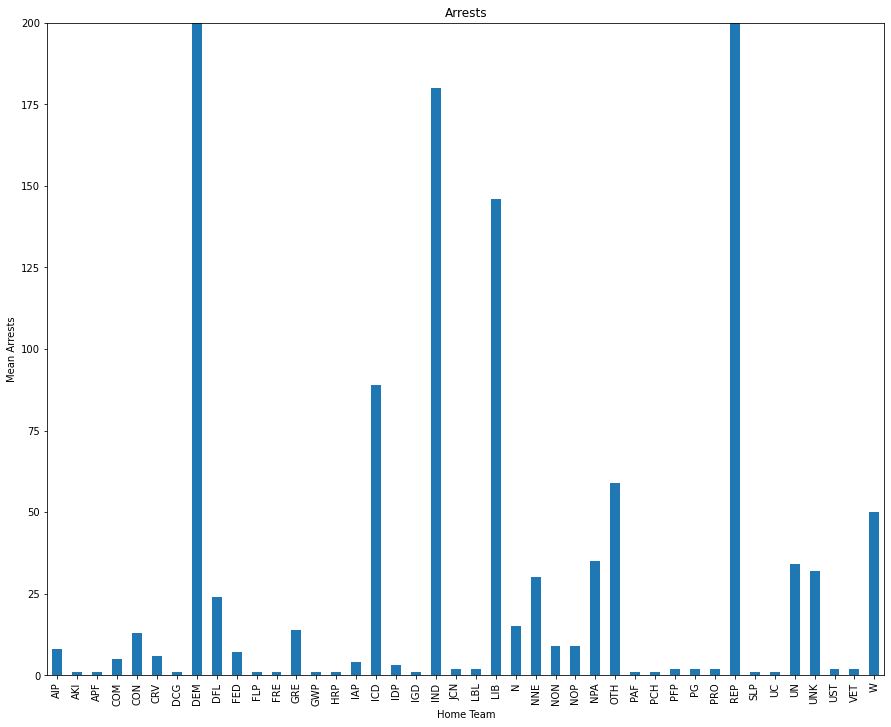

In [54]:
candidate_data_analysis = candidate_data.groupby(['Cand_Party_Affiliation'])['Cand_Id'].count()

candidate_data_analysis.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(15, 12), ylim=(0,200))

In [55]:
# exporting cleaned data to a csv
candidate_data.to_csv('./clean_data/cleaned_candidate_summary_2022')

https://stackoverflow.com/questions/54191821/attributeerror-str-object-has-no-attribute-str

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column